# ZUNYI LIN

## Research question/interests

1. What goal and project duration setting are most likely to fail on kickstarters?
2. What project category can have the highest pledge vs goal ratio?


In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("../data/raw/ks-projects-201801.csv")

In [3]:
dataset

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4       2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   
...                     ...      ...       ...      ...     ...          ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378661 rows x 15 columns]

# Milestone 3

### Task 1 - EDA

In [4]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

print("Number of rows and columns respectively:", dataset.shape)
print("Columns in the dataset:", dataset.columns)

Number of rows and columns respectively: (378661, 15)
Columns in the dataset: Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


#### Remove unnecessary data

In [5]:
dataset1 = dataset.drop(columns = ['ID', 'usd pledged', 'currency', 'goal', 'pledged', 'country'], inplace = False)
dataset1.head()

name        category  \
0                    The Songs of Adelaide & Abullah          Poetry   
1      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
2                                     Where is Hank?  Narrative Film   
3  ToshiCapital Rekordz Needs Help to Complete Album           Music   
4  Community Film Project: The Art of Neighborhoo...    Film & Video   

  main_category    deadline             launched     state  backers  \
0    Publishing  2015-10-09  2015-08-11 12:12:28    failed        0   
1  Film & Video  2017-11-01  2017-09-02 04:43:57    failed       15   
2  Film & Video  2013-02-26  2013-01-12 00:20:50    failed        3   
3         Music  2012-04-16  2012-03-17 03:24:11    failed        1   
4  Film & Video  2015-08-29  2015-07-04 08:35:03  canceled       14   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [6]:
dataset1 = dataset1.dropna()

In [7]:
dataset1 = dataset1.rename(columns={"usd_pledged_real": "pledged", "usd_goal_real": "goal", "state": "status"})

#### Get an overview of the data

In [8]:
dataset1.nunique(axis=0)

name             375764
category            159
main_category        15
deadline           3164
launched         378085
status                6
backers            3963
pledged          106065
goal              50339
dtype: int64

In [9]:
dataset1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T

count          mean             std       min          25%  \
backers  378657.000000    105.618544      907.189767  0.000000     2.000000   
pledged  378657.000000   9059.018090    90973.819013  0.000000    31.000000   
goal     378657.000000  45454.245896  1152956.113134  0.010000  2000.000000   

                 50%           75%               max  
backers    12.000000     56.000000     219382.000000  
pledged   624.380000   4050.000000   20338986.270000  
goal     5500.000000  15500.000000  166361390.710000

In [10]:
dataset1.describe(include='object').T

count  unique                       top    freq
name           378657  375764  New EP/Music Development      41
category       378657     159            Product Design   22313
main_category  378657      15              Film & Video   63584
deadline       378657    3164                2014-08-08     705
launched       378657  378085       1970-01-01 01:00:00       7
status         378657       6                    failed  197716

In [11]:
dataset1.shape

(378657, 9)

#### added a new column duration(days) = deadline - launched

In [12]:
dataset2 = dataset1.copy()
dataset2['launched'] = pd.to_datetime(dataset2['launched'])
dataset2['deadline'] = pd.to_datetime(dataset2['deadline'])
dataset2['duration'] = (dataset2['deadline'] - dataset2['launched']).dt.days
dataset2['completion'] = (dataset2['pledged'] / dataset2['goal'])*100

In [13]:
# check the duration columns data 
dataset2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T

count          mean             std       min  \
backers     378657.000000    105.618544      907.189767  0.000000   
pledged     378657.000000   9059.018090    90973.819013  0.000000   
goal        378657.000000  45454.245896  1152956.113134  0.010000   
duration    378657.000000     33.481127       65.909502  0.000000   
completion  378657.000000    323.615448    26690.681450  0.000000   

                    25%          50%           75%               max  
backers        2.000000    12.000000     56.000000     219382.000000  
pledged       31.000000   624.380000   4050.000000   20338986.270000  
goal        2000.000000  5500.000000  15500.000000  166361390.710000  
duration      29.000000    29.000000     36.000000      16738.000000  
completion     0.453333    13.466458    106.540000   10427789.000000

#### Remove project that is in canceled, live, suspended and undefined

In [14]:
#Due to the large dataset, it is too slow to work with, 
#I have to reduce the rows inorder to get some progress within deadline
#Only getting the data from goal between 25%-75%
dataset2 = dataset2[(dataset2['status'] != 'canceled')
                    & (dataset2['status'] != 'undefined')
                    & (dataset2['status'] != 'live')
                    & (dataset2['status'] != 'suspended')]

# check the duration columns data 
dataset2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T


count          mean             std       min  \
backers     331672.000000    116.382580      965.431577  0.000000   
pledged     331672.000000   9943.549278    96733.367226  0.000000   
goal        331672.000000  41509.658749  1108934.642072  0.010000   
duration    331672.000000     32.954889       12.713279  0.000000   
completion  331672.000000    351.041365    28253.618765  0.000000   

                    25%          50%           75%               max  
backers        2.000000    15.000000     63.000000     219382.000000  
pledged       50.000000   788.000000   4608.000000   20338986.270000  
goal        2000.000000  5000.000000  15000.000000  166361390.710000  
duration      29.000000    29.000000     35.000000         91.000000  
completion     0.750000    20.000000    109.500000   10427789.000000

#### Check data outliers with box plot

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goal', ylabel='Density'>

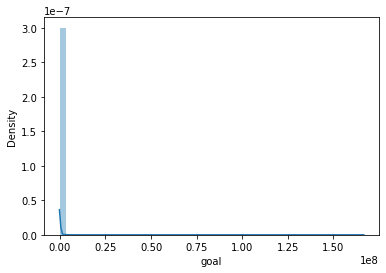

In [15]:
sns.distplot(dataset2['goal'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='backers', ylabel='Density'>

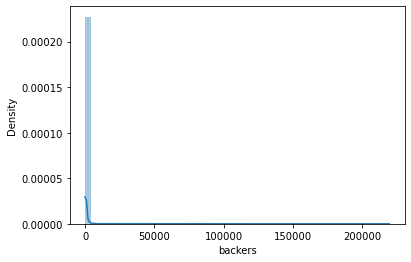

In [16]:
sns.distplot(dataset2['backers'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='completion', ylabel='Density'>

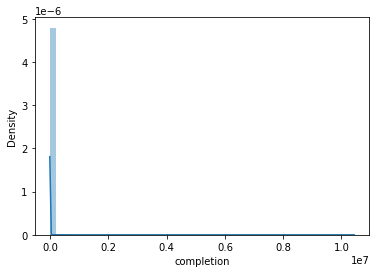

In [17]:
sns.distplot(dataset2['completion'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pledged', ylabel='Density'>

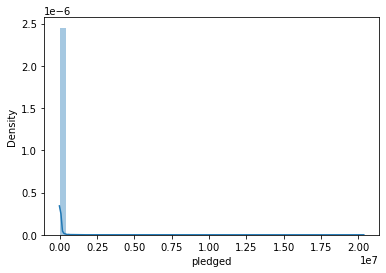

In [18]:
sns.distplot(dataset2['pledged'])

#### From the distribution plot we could see there are some outliers on the data
#### Remove outliers

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goal', ylabel='Density'>

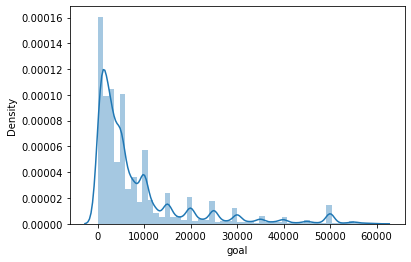

In [19]:
dataset3 = dataset2[(dataset2['goal'] < 60000)
                   & (dataset2['backers'] < 200)
                   & (dataset2['completion'] < 200)
                   & (dataset2['pledged'] < 15000)]
sns.distplot(dataset3['goal'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='backers', ylabel='Density'>

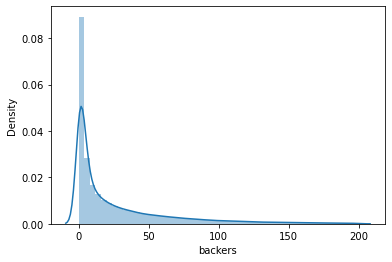

In [20]:
sns.distplot(dataset3['backers'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='completion', ylabel='Density'>

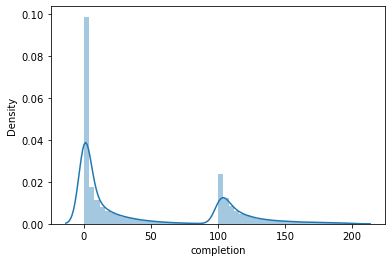

In [21]:
sns.distplot(dataset3['completion'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pledged', ylabel='Density'>

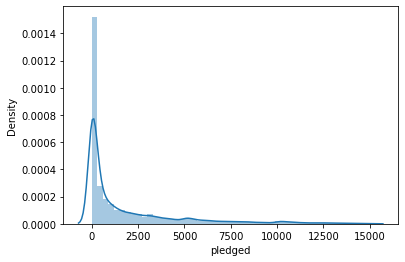

In [22]:
sns.distplot(dataset3['pledged'])

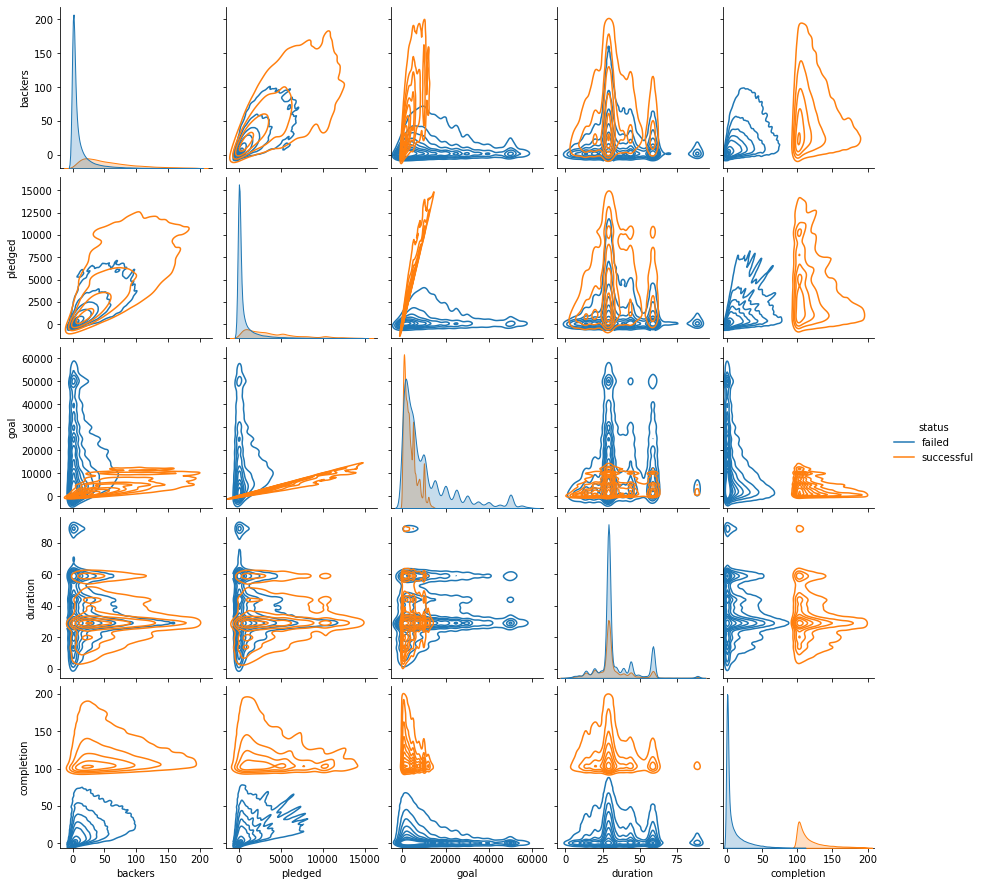

In [23]:
sns.pairplot(dataset3, hue = 'status', kind = 'kde')

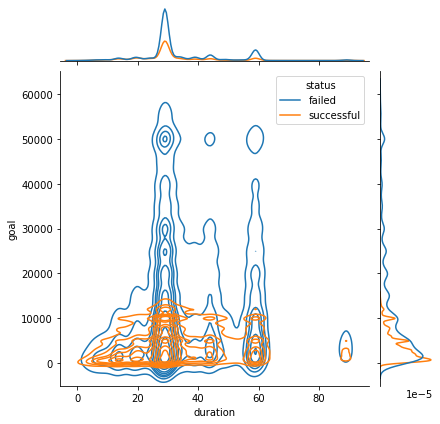

In [24]:
sns.jointplot(x='duration', y='goal', data=dataset3, kind='kde', hue='status')

In [25]:
dataset3_mx = dataset3.corr()
dataset3_mx

backers   pledged      goal  duration  completion
backers     1.000000  0.813826 -0.022494 -0.029251    0.625485
pledged     0.813826  1.000000  0.067377 -0.006056    0.577647
goal       -0.022494  0.067377  1.000000  0.117999   -0.330973
duration   -0.029251 -0.006056  0.117999  1.000000   -0.112026
completion  0.625485  0.577647 -0.330973 -0.112026    1.000000

<AxesSubplot:>

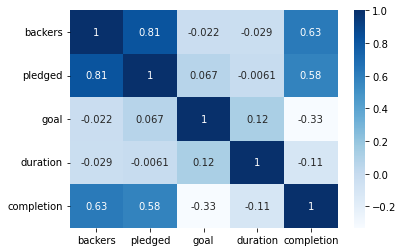

In [26]:
sns.heatmap(dataset3_mx, annot=True, cmap='Blues')

<AxesSubplot:xlabel='main_category', ylabel='Count'>

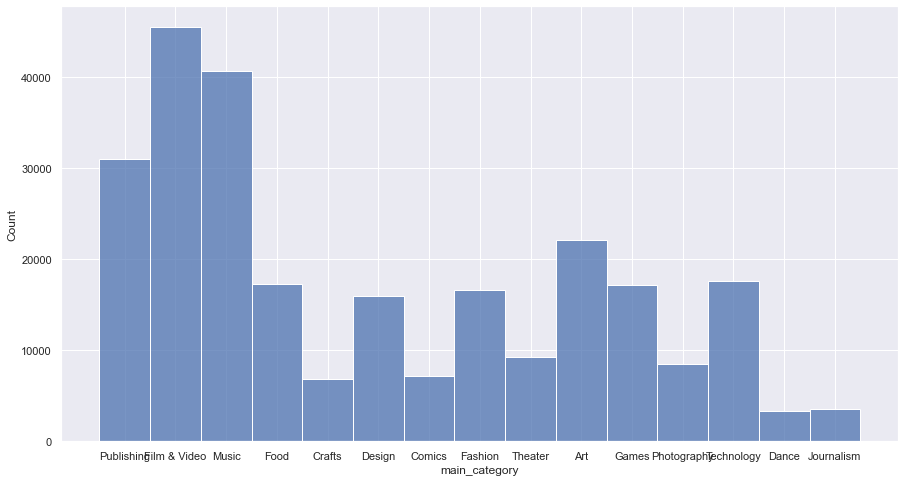

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x="main_category", data=dataset3)

<AxesSubplot:xlabel='main_category', ylabel='Count'>

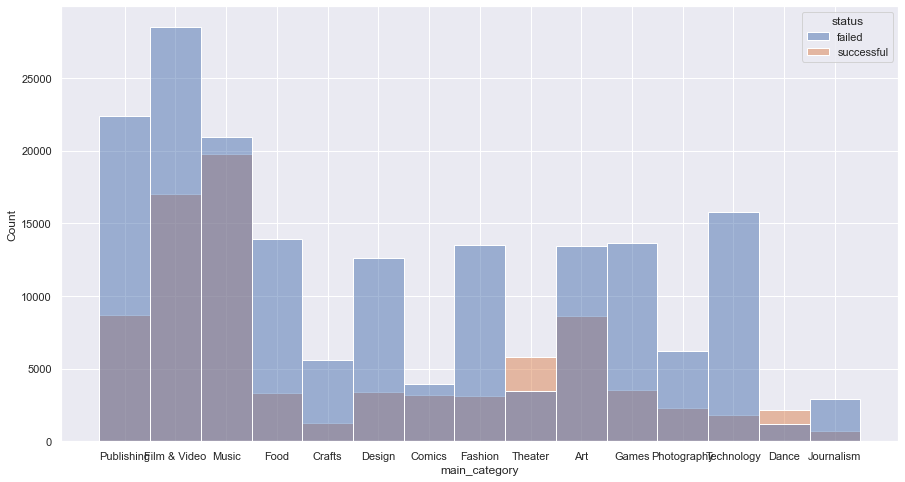

In [28]:
sns.histplot(x="main_category", data=dataset3, hue='status')

### Task 2-3 - Load Raw and Processed Data

#### 1. Load Raw Data

In [29]:
import project_functions2 as pf2

In [30]:
datafilepath = "../data/raw/ks-projects-201801.csv"
rawdf = pf2.unprocessed(datafilepath)
rawdf

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4       2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   
...                     ...      ...       ...      ...     ...          ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378661 rows x 15 columns]

#### 2. Load Processed Data

In [31]:
processeddata = pf2.load_and_process(datafilepath)
processeddata

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1           Greeting From Earth: ZGAC Arts Capsule For ET   Narrative Film   
2                                          Where is Hank?   Narrative Film   
3       ToshiCapital Rekordz Needs Help to Complete Album            Music   
6       Support Solar Roasted Coffee & Green Energy!  ...             Food   
...                                                   ...              ...   
378654              Homemade fresh dog food, Cleveland OH      Small Batch   
378657                                          The Tribe   Narrative Film   
378658  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
378659                           BioDefense Education Kit       Technology   
378660                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category   deadline            launched      status  backers  \
0         Publishing 2015-10-09 2015-08-11 12:12:28      failed        0   
1       Film & Video 2017-11-01 2017-09-02 04:43:57      failed       15   
2       Film & Video 2013-02-26 2013-01-12 00:20:50      failed        3   
3              Music 2012-04-16 2012-03-17 03:24:11      failed        1   
6               Food 2014-12-21 2014-12-01 18:30:44  successful       16   
...              ...        ...                 ...         ...      ...   
378654          Food 2017-04-19 2017-03-20 22:08:22      failed        4   
378657  Film & Video 2011-07-19 2011-06-22 03:35:14      failed        5   
378658  Film & Video 2010-08-16 2010-07-01 19:40:30      failed        1   
378659    Technology 2016-02-13 2016-01-13 18:13:53      failed        6   
378660           Art 2011-08-16 2011-07-19 09:07:47      failed       17   

        pledged      goal  duration  completion  
0           0.0   1533.95        58    0.000000  
1        2421.0  30000.00        59    8.070000  
2         220.0  45000.00        44    0.488889  
3           1.0   5000.00        29    0.020000  
6        1205.0   1000.00        19  120.500000  
...         ...       ...       ...         ...  
378654    154.0   6500.00        29    2.369231  
378657    155.0   1500.00        26   10.333333  
378658     20.0  15000.00        45    0.133333  
378659    200.0  15000.00        30    1.333333  
378660    524.0   2000.00        27   26.200000  

[262463 rows x 11 columns]

### Task 4 - Data Analysis

In [32]:
print("Number of rows and columns respectively:", processeddata.shape)
print("Columns in the dataset:", processeddata.columns)

Number of rows and columns respectively: (262463, 11)
Columns in the dataset: Index(['name', 'category', 'main_category', 'deadline', 'launched', 'status',
       'backers', 'pledged', 'goal', 'duration', 'completion'],
      dtype='object')


In [33]:
processeddata.describe(include='number').T

count         mean           std   min          25%  \
backers     262463.0    26.536655     37.510802  0.00     2.000000   
pledged     262463.0  1841.867667   2876.291978  0.00    26.000000   
goal        262463.0  8587.330507  11020.249113  0.15  1800.000000   
duration    262463.0    32.916754     12.981219  0.00    29.000000   
completion  262463.0    44.367153     53.958742  0.00     0.516668   

                    50%           75%           max  
backers        9.000000     37.000000    199.000000  
pledged      437.030000   2480.925000  14992.710000  
goal        5000.000000  10000.000000  59999.990000  
duration      29.000000     35.000000     91.000000  
completion    10.958342    102.583333    199.999061

In [34]:
processeddata.describe(include='object').T

count  unique                       top    freq
name           262463  260875  New EP/Music Development      15
category       262463     159            Product Design   11174
main_category  262463      15              Film & Video   45525
status         262463       2                    failed  177830

#### Analysis

- Film & Video is the most popular category for kickstarters
- Product Design is the most popular sub-category for kickstarters.
- About 67% of all kickstarter project end up failed.
- On average a kickstarter project is set to run for 33 days.
- On average a kickstarter can raise 109% of the set goal, failed or successed.

In [35]:
from pandas_profiling import ProfileReport 
from ipywidgets import widgets 
profile = ProfileReport(processeddata, title="Kickstarter Pandas Profiling Report",explorative=True) 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
processeddata0 = processeddata[(processeddata['duration'] == 0) & (processeddata['status'] == 'successful')]
processeddata0.describe()

backers      pledged         goal  duration  completion
count   18.000000    18.000000    18.000000      18.0   18.000000
mean    19.555556   951.417222   785.195000       0.0  113.729579
std     39.196672  2067.605280  1580.439653       0.0   19.600701
min      1.000000     1.000000     1.000000       0.0  100.000000
25%      1.000000    16.250000    16.250000       0.0  100.000000
50%      5.000000   136.730000   117.570000       0.0  100.624762
75%     15.000000   482.002500   482.002500       0.0  119.831653
max    161.000000  7740.260000  5000.000000       0.0  160.321716

#### Pandas Profiling Analysis

- 13.4% of all projects have no backers.
- the most common values for goals are \\$5000, \\$10000, \\$3000, \\$1000, \\$2000
- 45.9\% of projects set deadlines for 30 days, 8.5\% of projects set deadlines for 60 days.
- There are 71 projects has deadline within the same day of launching, 18 of these proejcts end up successful.


<AxesSubplot:xlabel='duration', ylabel='Probability'>

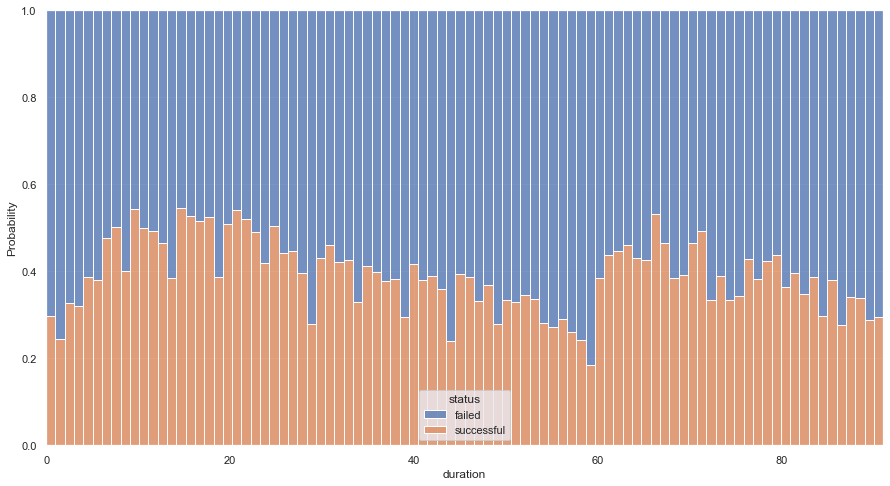

In [79]:
sns.histplot(x="duration", data=processeddata, hue='status', bins = 90, stat="probability", multiple="fill")

<AxesSubplot:xlabel='duration', ylabel='Count'>

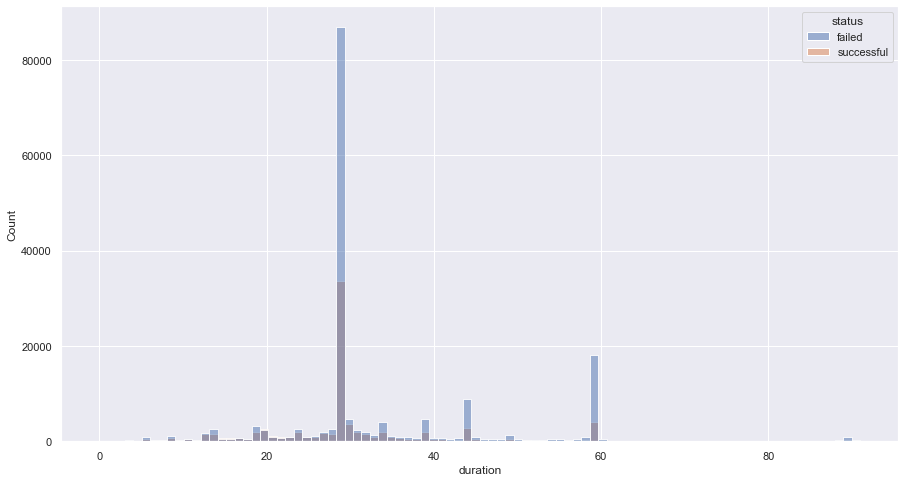

In [80]:
sns.histplot(x="duration", data=processeddata, hue='status', bins = 90)

#### Graph Analysis
The first graph shows the probability of failed vs successful project under different duration
From the first graph, we could see that project sets deadline for 60 days, 45 days, 30 days has higher probability to fail.
However from graph two, it shows there are very few samples on durations other than 60, 45, and 30, so the sample size might not be large enough to conclude this.

<AxesSubplot:xlabel='goal', ylabel='Probability'>

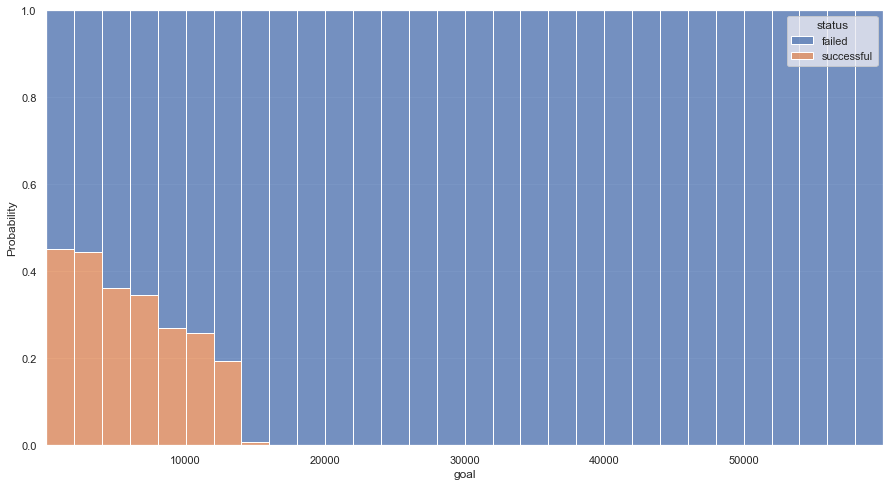

In [81]:
sns.histplot(x="goal", data=processeddata, hue='status', bins = 30, stat="probability", multiple="fill")

#### Graph Analysis
From first graph we can see that the probability of a project to fail is nearly 99% if they set the goal greater than $15000.
And a lower goal setting in a project has a higher chance of success.


<AxesSubplot:xlabel='main_category', ylabel='Count'>

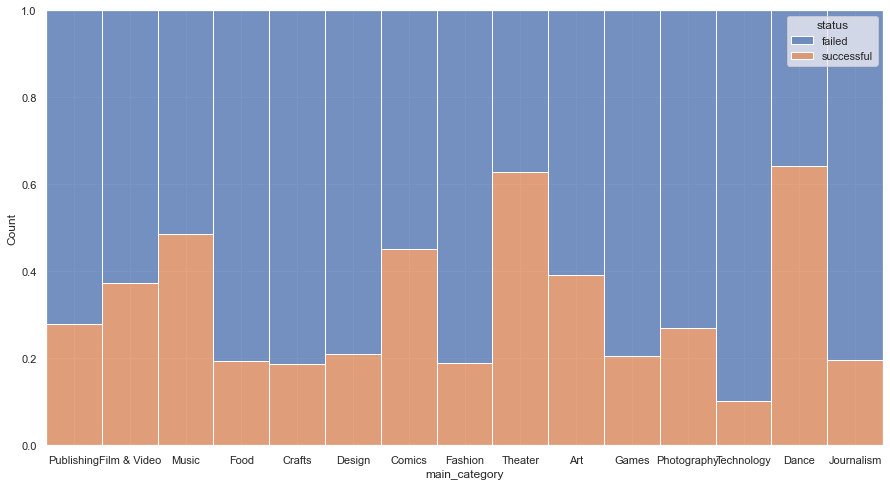

In [110]:
sns.histplot(x="main_category", data=processeddata, hue='status', multiple='fill')

In [109]:
processeddata[['main_category','goal']].groupby('main_category').mean()

goal
main_category              
Art             5527.582908
Comics          5684.084314
Crafts          5471.179939
Dance           5039.173793
Design         12651.838977
Fashion         8889.888876
Film & Video    9066.567732
Food           12669.151918
Games          10422.004097
Journalism      7978.928381
Music           5821.672828
Photography     6485.898064
Publishing      7178.813536
Technology     16206.932399
Theater         5326.444739

#### Graph analysis
From the graph, we can see that projects in main category dance has the highest chance of success.
And from the mean table grouped by main_category, we can see that dance has the lowest goal settings.
Which we found in previous graph, that a project tends to be successful if they have a lower goal setting.
